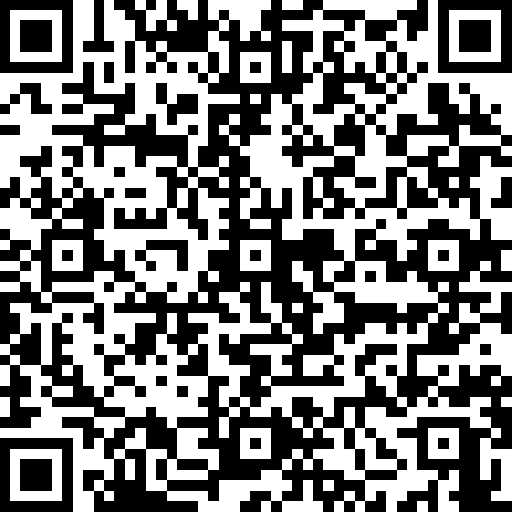

# [ecal.ipynb](https://github.com/lafefspietz/mm4250-ecal/blob/main/ecal.ipynb)

This notebook is generated from the data set [github.com/lafefspietz/nist_MM4250_calibration_data_2025](https://github.com/lafefspietz/nist_MM4250_calibration_data_2025) associated with the IEEE Journal of Microwaves paper [Cryogenic RF MEMS Switch With Electronic Calibration Capability](https://doi.org/10.1109/JMW.2025.3638273) published as a collaboration between [NIST](https://www.nist.gov/), [Menlo Micro](https://menlomicro.com/), and [FormFactor](https://www.formfactor.com/).  This notebook is available at [github.com/lafefspietz/mm4250-ecal](https://github.com/lafefspietz/mm4250-ecal/).

## Prerequisites
This is a [Jupyter notebook](https://jupyter.org/), which you can run most easily by [installing Anaconda](https://www.anaconda.com/) on your computer. 

This notebook requires [numpy](https://numpy.org/), [scikti-rf](https://scikit-rf.org/), and [matplotlib](https://matplotlib.org/).  If any of those are not installed, use "pip install" as follows for whatever is missing:

```
pip install matplotlib
pip install numpy
pip install scikit-rf
```
## Project and Data Files

<pre>
- mm4250-ecal
  ├── ecal.ipynb (this notebook)
  ├── ideals/
  ├── rawdata/
</pre>

To run this notebook, two additional directories need to be included in the same directory as this notebook. The `ideals/` directory should contain the open, short, load ideals for each port, and the `rawdata/` should contain the raw measured data from each of the MM4250 ports. The user can input and run their own data or they can use the default data already in the project, which are copied from the following zips in the `assets/` directory.

 - [nist-mm4250-ideals.zip](https://github.com/lafefspietz/mm4250-ecal/raw/refs/heads/main/assets/nist-mm4250-ideals.zip)
 - [example-rawdata.zip](https://github.com/lafefspietz/mm4250-ecal/raw/refs/heads/main/assets/example-rawdata.zip)

***If using your own ideals or data, check examples for how to name data files.***

## Setup and Calibration

In [1]:
# load needed python libraries matplotlib, numpy, and scikit-rf
import matplotlib.pyplot as plt
import numpy as np
import skrf as rf
from scipy import signal

In [3]:
# load all Touchstone files in "ideals" folder into scikit-rf
ideals = rf.read_all('ideals')
# load all Touchstone files in "rawdata" folder into scikit-rf
rawdata =  rf.read_all('rawdata')

In [5]:
# create a Python list of scikit-rf "network objects" of short open and load ideals for each of the six ports 
my_ideals_port1 = [\
    ideals['ideal_port1_short'],
    ideals['ideal_port1_open'],
    ideals['ideal_port1_load'],
]
my_ideals_port2 = [\
    ideals['ideal_port2_short'],
    ideals['ideal_port2_open'],
    ideals['ideal_port2_load'],
]
my_ideals_port3 = [\
    ideals['ideal_port3_short'],
    ideals['ideal_port3_open'],
    ideals['ideal_port3_load'],
]
my_ideals_port4 = [\
    ideals['ideal_port4_short'],
    ideals['ideal_port4_open'],
    ideals['ideal_port4_load'],
]
my_ideals_port5 = [\
    ideals['ideal_port5_short'],
    ideals['ideal_port5_open'],
    ideals['ideal_port5_load'],
]
my_ideals_port6 = [\
    ideals['ideal_port6_short'],
    ideals['ideal_port6_open'],
    ideals['ideal_port6_load'],
]

In [7]:
# create a Python list of scikit-rf "network objects" of measured short open and load using the internal standards in the switch 
my_measured = [\
        rawdata['ecal_short'],
        rawdata['ecal_open'],
        rawdata['ecal_load'],
        ]

In [9]:
# Create scikit-rf One Port calibration objects for each of the six ports 
# This will warn that the frequencies of the ideals don't match that of your data.
# As long as your data points are all between 1 MHz and 20 GHz it should be able to automatically interpolate and these warnings may be ignored
cal_port1 = rf.OnePort(\
        ideals = my_ideals_port1,
        measured = my_measured,
        )
cal_port2 = rf.OnePort(\
        ideals = my_ideals_port2,
        measured = my_measured,
        )
cal_port3 = rf.OnePort(\
        ideals = my_ideals_port3,
        measured = my_measured,
        )
cal_port4 = rf.OnePort(\
        ideals = my_ideals_port4,
        measured = my_measured,
        )
cal_port5 = rf.OnePort(\
        ideals = my_ideals_port5,
        measured = my_measured,
        )
cal_port6 = rf.OnePort(\
        ideals = my_ideals_port6,
        measured = my_measured,
        )

                    attempting to interpolate the ideal[0] Network ..
Success
                    attempting to interpolate the ideal[1] Network ..
Success
                    attempting to interpolate the ideal[2] Network ..
Success
                    attempting to interpolate the ideal[0] Network ..
Success
                    attempting to interpolate the ideal[1] Network ..
Success
                    attempting to interpolate the ideal[2] Network ..
Success
                    attempting to interpolate the ideal[0] Network ..
Success
                    attempting to interpolate the ideal[1] Network ..
Success
                    attempting to interpolate the ideal[2] Network ..
Success
                    attempting to interpolate the ideal[0] Network ..
Success
                    attempting to interpolate the ideal[1] Network ..
Success
                    attempting to interpolate the ideal[2] Network ..
Success
                    attempting to interpolate the ideal[0] Netwo

In [11]:
# Run each calibration, performing the algebra to get from the measured and ideals to a usable correction
# To see exactly what is happening see source at https://scikit-rf.readthedocs.io/en/v1.8.0/_modules/skrf/calibration/calibration.html#OnePort.run
cal_port1.run()
cal_port2.run()
cal_port3.run()
cal_port4.run()
cal_port5.run()
cal_port6.run()

In [12]:
# Apply the correction to all the raw data and create scikit-rf network objects for corrected measurements on each of the six ports
port1_corrected = cal_port1.apply_cal(rawdata['port1'])
port2_corrected = cal_port2.apply_cal(rawdata['port2'])
port3_corrected = cal_port3.apply_cal(rawdata['port3'])
port4_corrected = cal_port4.apply_cal(rawdata['port4'])
port5_corrected = cal_port5.apply_cal(rawdata['port5'])
port6_corrected = cal_port6.apply_cal(rawdata['port6'])

In [25]:
import os

# Save corrected data to correcteddata directory

# Create directory if it doesn't exist
os.makedirs('correcteddata', exist_ok=True)

# Save all corrected port data
port1_corrected.write_touchstone('correcteddata/port1_corrected.s1p')
port2_corrected.write_touchstone('correcteddata/port2_corrected.s1p')
port3_corrected.write_touchstone('correcteddata/port3_corrected.s1p')
port4_corrected.write_touchstone('correcteddata/port4_corrected.s1p')
port5_corrected.write_touchstone('correcteddata/port5_corrected.s1p')
port6_corrected.write_touchstone('correcteddata/port6_corrected.s1p')

print("Corrected data saved to correcteddata/ directory")

Corrected data saved to correcteddata/ directory


## Raw Data Plots

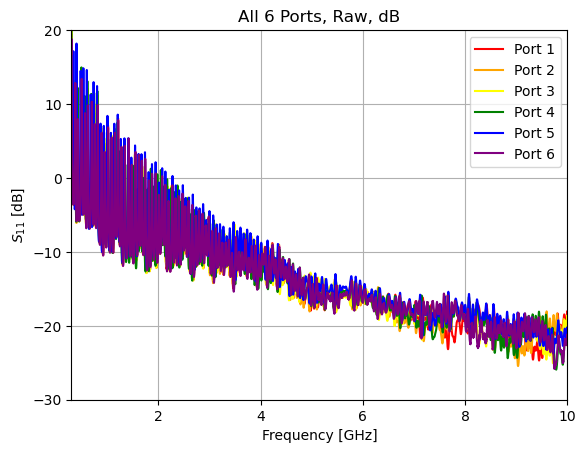

In [15]:
fghz = port1_corrected.f/1e9
plt.plot(fghz,rawdata['port1'].s_db[:,0,0],color="red")
plt.plot(fghz,rawdata['port2'].s_db[:,0,0],color="orange")
plt.plot(fghz,rawdata['port3'].s_db[:,0,0],color="yellow")
plt.plot(fghz,rawdata['port4'].s_db[:,0,0],color="green")
plt.plot(fghz,rawdata['port5'].s_db[:,0,0],color="blue")
plt.plot(fghz,rawdata['port6'].s_db[:,0,0],color="purple")

plt.xlim(0.3,10)
plt.grid()
plt.ylim(-30,20)
plt.title("All 6 Ports, Raw, dB")
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ [dB]')
plt.legend(("Port 1","Port 2","Port 3","Port 4","Port 5","Port 6"))

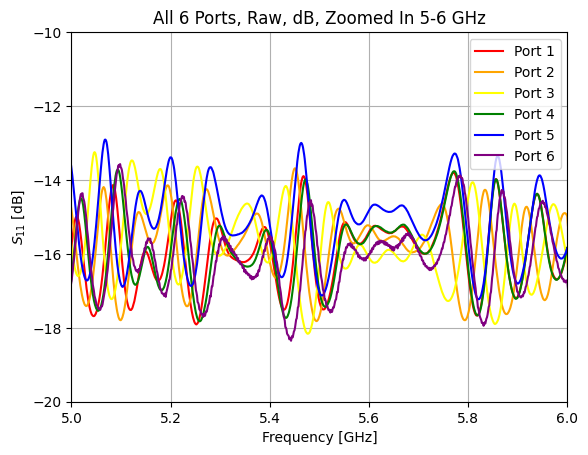

In [27]:
fghz = port1_corrected.f/1e9
plt.plot(fghz,rawdata['port1'].s_db[:,0,0],color="red")
plt.plot(fghz,rawdata['port2'].s_db[:,0,0],color="orange")
plt.plot(fghz,rawdata['port3'].s_db[:,0,0],color="yellow")
plt.plot(fghz,rawdata['port4'].s_db[:,0,0],color="green")
plt.plot(fghz,rawdata['port5'].s_db[:,0,0],color="blue")
plt.plot(fghz,rawdata['port6'].s_db[:,0,0],color="purple")

plt.xlim(5,6)
plt.grid()
plt.ylim(-20,-10)
plt.title("All 6 Ports, Raw, dB, Zoomed In 5-6 GHz")
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ [dB]')
plt.legend(("Port 1","Port 2","Port 3","Port 4","Port 5","Port 6"))

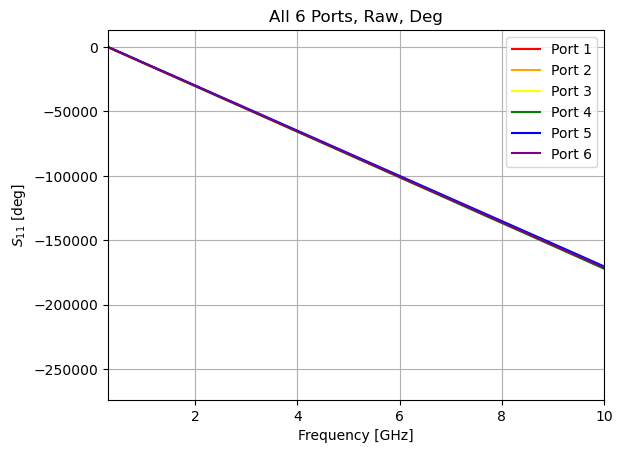

In [17]:
fghz = port1_corrected.f/1e9
plt.plot(fghz,rawdata['port1'].s_deg_unwrap[:,0,0],color="red")
plt.plot(fghz,rawdata['port2'].s_deg_unwrap[:,0,0],color="orange")
plt.plot(fghz,rawdata['port3'].s_deg_unwrap[:,0,0],color="yellow")
plt.plot(fghz,rawdata['port4'].s_deg_unwrap[:,0,0],color="green")
plt.plot(fghz,rawdata['port5'].s_deg_unwrap[:,0,0],color="blue")
plt.plot(fghz,rawdata['port6'].s_deg_unwrap[:,0,0],color="purple")

plt.xlim(0.3,10)
plt.grid()
#plt.ylim(-2,2)
plt.title("All 6 Ports, Raw, Deg")
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ [deg]')
plt.legend(("Port 1","Port 2","Port 3","Port 4","Port 5","Port 6"))

## Corrected Data Plots

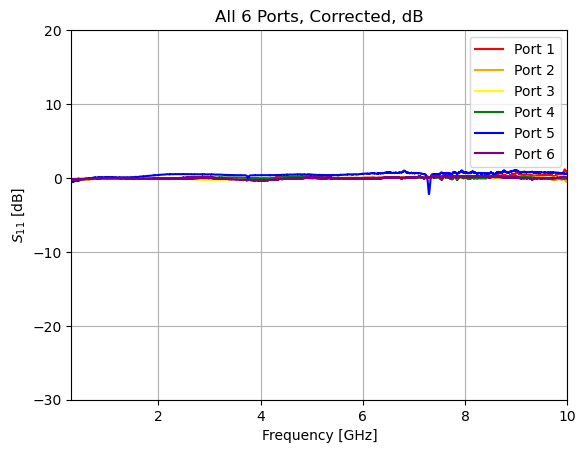

In [19]:
fghz = port1_corrected.f/1e9
plt.plot(fghz,port1_corrected.s_db[:,0,0],color="red")
plt.plot(fghz,port2_corrected.s_db[:,0,0],color="orange")
plt.plot(fghz,port3_corrected.s_db[:,0,0],color="yellow")
plt.plot(fghz,port4_corrected.s_db[:,0,0],color="green")
plt.plot(fghz,port5_corrected.s_db[:,0,0],color="blue")
plt.plot(fghz,port6_corrected.s_db[:,0,0],color="purple")

plt.xlim(0.3,10)
plt.grid()
plt.ylim(-30,20)
plt.title("All 6 Ports, Corrected, dB")
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ [dB]')
plt.legend(("Port 1","Port 2","Port 3","Port 4","Port 5","Port 6"))

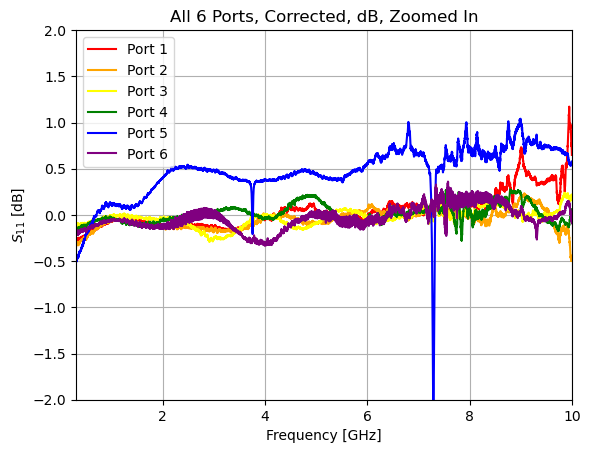

In [21]:
fghz = port1_corrected.f/1e9
plt.plot(fghz,port1_corrected.s_db[:,0,0],color="red")
plt.plot(fghz,port2_corrected.s_db[:,0,0],color="orange")
plt.plot(fghz,port3_corrected.s_db[:,0,0],color="yellow")
plt.plot(fghz,port4_corrected.s_db[:,0,0],color="green")
plt.plot(fghz,port5_corrected.s_db[:,0,0],color="blue")
plt.plot(fghz,port6_corrected.s_db[:,0,0],color="purple")

plt.xlim(0.3,10)
plt.grid()
plt.ylim(-2,2)
plt.title("All 6 Ports, Corrected, dB, Zoomed In")
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ [dB]')
plt.legend(("Port 1","Port 2","Port 3","Port 4","Port 5","Port 6"))

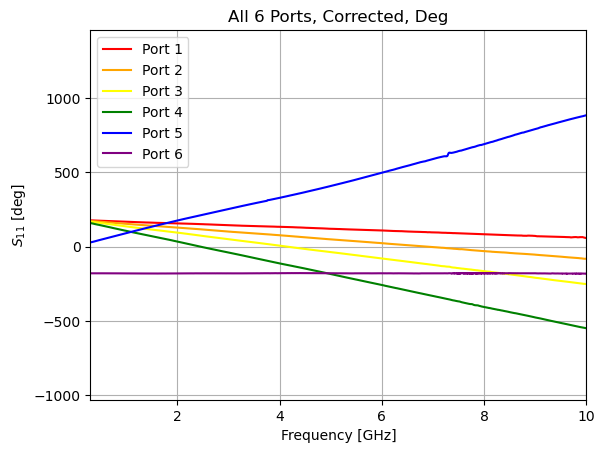

In [23]:
fghz = port1_corrected.f/1e9
plt.plot(fghz,port1_corrected.s_deg_unwrap[:,0,0],color="red")
plt.plot(fghz,port2_corrected.s_deg_unwrap[:,0,0],color="orange")
plt.plot(fghz,port3_corrected.s_deg_unwrap[:,0,0],color="yellow")
plt.plot(fghz,port4_corrected.s_deg_unwrap[:,0,0],color="green")
plt.plot(fghz,port5_corrected.s_deg_unwrap[:,0,0],color="blue")
plt.plot(fghz,port6_corrected.s_deg_unwrap[:,0,0],color="purple")

plt.xlim(0.3,10)
plt.grid()
#plt.ylim(-2,2)
plt.title("All 6 Ports, Corrected, Deg")
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ [deg]')
plt.legend(("Port 1","Port 2","Port 3","Port 4","Port 5","Port 6"))

In [80]:
from scipy import signal
ecaldata = {}
ecaldata['fghz'] = signal.decimate(fghz,10).tolist()
ecaldata['short_mag'] =   signal.decimate(rawdata['ecal_short'].s_db[:,0,0]  , 10).tolist()
ecaldata['short_phase'] = signal.decimate(rawdata['ecal_short'].s_deg_unwrap[:,0,0]  ,10).tolist()
ecaldata['open_mag'] =    signal.decimate(rawdata['ecal_open'].s_db[:,0,0]  , 10).tolist()
ecaldata['open_phase'] =  signal.decimate(rawdata['ecal_open'].s_deg_unwrap[:,0,0]  ,10).tolist()
ecaldata['load_mag'] =    signal.decimate(rawdata['ecal_load'].s_db[:,0,0]  , 10).tolist()
ecaldata['load_phase'] =  signal.decimate(rawdata['ecal_load'].s_deg_unwrap[:,0,0]  ,10).tolist()
ecaldata['port1_mag_raw'] =   signal.decimate(rawdata['port1'].s_db[:,0,0]  , 10).tolist()
ecaldata['port1_phase_raw'] = signal.decimate(rawdata['port1'].s_deg_unwrap[:,0,0]  ,10).tolist()
ecaldata['port2_mag_raw'] =   signal.decimate(rawdata['port1'].s_db[:,0,0]  , 10).tolist()
ecaldata['port2_phase_raw'] = signal.decimate(rawdata['port1'].s_deg_unwrap[:,0,0]  ,10).tolist()
ecaldata['port3_mag_raw'] =   signal.decimate(rawdata['port1'].s_db[:,0,0]  , 10).tolist()
ecaldata['port3_phase_raw'] = signal.decimate(rawdata['port1'].s_deg_unwrap[:,0,0]  ,10).tolist()
ecaldata['port4_mag_raw'] =   signal.decimate(rawdata['port1'].s_db[:,0,0]  , 10).tolist()
ecaldata['port4_phase_raw'] = signal.decimate(rawdata['port1'].s_deg_unwrap[:,0,0]  ,10).tolist()
ecaldata['port5_mag_raw'] =   signal.decimate(rawdata['port1'].s_db[:,0,0]  , 10).tolist()
ecaldata['port5_phase_raw'] = signal.decimate(rawdata['port1'].s_deg_unwrap[:,0,0]  ,10).tolist()
ecaldata['port6_mag_raw'] =   signal.decimate(rawdata['port1'].s_db[:,0,0]  , 10).tolist()
ecaldata['port6_phase_raw'] = signal.decimate(rawdata['port1'].s_deg_unwrap[:,0,0]  ,10).tolist()
ecaldata['port1_mag_ecal'] =  signal.decimate(port1_corrected.s_db[:,0,0]  , 10).tolist()
ecaldata['port1_phase_ecal'] =signal.decimate(port1_corrected.s_deg_unwrap[:,0,0]  ,10).tolist()
ecaldata['port2_mag_ecal'] =  signal.decimate(port2_corrected.s_db[:,0,0]  , 10).tolist()
ecaldata['port2_phase_ecal'] =signal.decimate(port2_corrected.s_deg_unwrap[:,0,0]  ,10).tolist()
ecaldata['port3_mag_ecal'] =  signal.decimate(port3_corrected.s_db[:,0,0]  , 10).tolist()
ecaldata['port3_phase_ecal'] =signal.decimate(port3_corrected.s_deg_unwrap[:,0,0]  ,10).tolist()
ecaldata['port4_mag_ecal'] =  signal.decimate(port4_corrected.s_db[:,0,0]  , 10).tolist()
ecaldata['port4_phase_ecal'] =signal.decimate(port4_corrected.s_deg_unwrap[:,0,0]  ,10).tolist()
ecaldata['port5_mag_ecal'] =  signal.decimate(port5_corrected.s_db[:,0,0]  , 10).tolist()
ecaldata['port5_phase_ecal'] =signal.decimate(port5_corrected.s_deg_unwrap[:,0,0]  ,10).tolist()
ecaldata['port6_mag_ecal'] =  signal.decimate(port6_corrected.s_db[:,0,0]  , 10).tolist()
ecaldata['port6_phase_ecal'] =signal.decimate(port6_corrected.s_deg_unwrap[:,0,0]  ,10).tolist()


In [47]:
ecaldata

{'fghz': [0.3,
  0.3011484375,
  0.302296875,
  0.3034453125,
  0.30459375,
  0.3057421875,
  0.306890625,
  0.3080390625,
  0.3091875,
  0.3103359375,
  0.311484375,
  0.3126328125,
  0.31378125,
  0.3149296875,
  0.316078125,
  0.3172265625,
  0.318375,
  0.3195234375,
  0.320671875,
  0.3218203125,
  0.32296875,
  0.3241171875,
  0.325265625,
  0.3264140625,
  0.3275625,
  0.3287109375,
  0.329859375,
  0.3310078125,
  0.33215625,
  0.3333046875,
  0.334453125,
  0.3356015625,
  0.33675,
  0.3378984375,
  0.339046875,
  0.3401953125,
  0.34134375,
  0.3424921875,
  0.343640625,
  0.3447890625,
  0.3459375,
  0.3470859375,
  0.348234375,
  0.3493828125,
  0.35053125,
  0.3516796875,
  0.352828125,
  0.3539765625,
  0.355125,
  0.3562734375,
  0.357421875,
  0.3585703125,
  0.35971875,
  0.3608671875,
  0.362015625,
  0.3631640625,
  0.3643125,
  0.3654609375,
  0.366609375,
  0.3677578125,
  0.36890625,
  0.3700546875,
  0.371203125,
  0.3723515625,
  0.3735,
  0.3746484375,
  0.3757

In [82]:
file_object = open("ecaldata.js", "w")
file_object.write("ecaldata =" + json.dumps(ecaldata) + ";")
file_object.close()

In [55]:
len(ecaldata['port6_phase_ecal'])

12801

[0.29633512610388746,
 0.3078725737695834,
 0.3192278096627067,
 0.33056419967937006,
 0.3420279410553885,
 0.3532877389815498,
 0.3647212791888655,
 0.37601151628868457,
 0.38739825147542795,
 0.3987479635260355,
 0.4100803430539573,
 0.42146536780049904,
 0.43278599554966474,
 0.44416327985094417,
 0.4555033591661025,
 0.4668579909596545,
 0.47821728387287593,
 0.48955975935734697,
 0.5009234195081612,
 0.5122679534398329,
 0.5236255930651915,
 0.534977460620215,
 0.5463286091545632,
 0.5576848240473509,
 0.5690341631768432,
 0.5803899839737588,
 0.5917411574545018,
 0.603094582390085,
 0.6144479658537757,
 0.6257998423272659,
 0.6371539409493642,
 0.6485058544747754,
 0.6598594013732654,
 0.6712120920757035,
 0.6825648919132719,
 0.6939181289162033,
 0.7052706536814995,
 0.7166239107497094,
 0.727976597793655,
 0.7393296047061161,
 0.7506825428728252,
 0.7620353584284536,
 0.7733884002926159,
 0.7847411981297442,
 0.7960941935964403,
 0.8074470712965437,
 0.8187999828255194,
 0.8301